## Messing around with a Classifier:

Need to distinguish CSD from Non-CSD

In [223]:
## First build dataset: 
import os
import pickle
from pose_class import Trajectory
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

playback_df = pd.read_csv('/data/birds/postures/presentation_info4.csv',delimiter=',')

seq_dir = './CrapSeqs/'
non_list,csd_list = [],[]
part_list = []
potent_list,weak_list = [],[]
n_bins = 100

BLOCK = True
R_HIGH = 0.7
R_LOW = 0.4
high_list,low_list = [],[]


potent_song = ['BDY','ND']
weak_song = ['LB','DMG','BOD','DBR']

non_dist,csd_dist = [],[]
part_dist = []
potent_dist,weak_dist = [],[]
high_dist,low_dist = [],[]

#print(playback_df)
if False:
    for f in os.listdir(seq_dir):
        #print(f)
        seq = pickle.load(open(seq_dir + f,'rb'))
        if 'floor' in seq.notes:
            continue
        if seq.offset == 0:
            continue
        if seq.posture == 2:
            print('crap partial!')
        neg_index = np.argmax(seq.ts >= -1)
        zero_index = np.argmax(seq.ts >= 0)
        four_index = np.argmax(seq.ts >= 4)
        bins = np.linspace(neg_index,four_index,n_bins,dtype=int)

        tail_bins = seq.smooth_data[bins,3,2]
        #print(seq.smooth_data[bins,3,2])
        if False:
            fig,ax = plt.subplots()
            ax.plot(tail_bins)
            fig.show()
        non_list.append(tail_bins)

        
good_dir = './SeqClasses/'
p_count = 0
nan_len = []
for f in os.listdir(good_dir):
    seq = pickle.load(open(good_dir + f,'rb'))
    if 'floor' in seq.notes:
        continue
    if seq.offset == 0:
        continue
    if not seq.clean:
        continue
    NON = False
    if seq.posture == 2:
        print('partial!')
        PART = True
    elif seq.posture == 1:
        PART = False
        #print(seq.song)
    else:
        #print('Non-posture!')
        NON = True
        PART = False
    neg_index = np.argmax(seq.ts >= -1)
    zero_index = np.argmax(seq.ts >= 0)
    four_index = np.argmax(seq.ts >= 4)    
    bins = np.linspace(neg_index,four_index,n_bins,dtype=int)
    tail_bins = seq.smooth_data[bins,10,2]

    if max(np.isnan(tail_bins)) != 0:
        print('Nans, skipping')
        if PART:
            p_count += 1
            nan_len.append(np.sum(np.isnan(tail_bins)))
        continue
    dists = []
    for b in bins:
        dists.append(pdist(seq.smooth_data[b,:14]))
    dists = np.array(dists)
    
    if PART:
        part_list.append(tail_bins)
        part_dist.append(dists)
    elif NON:
        non_list.append(tail_bins)
        non_dist.append(dists)
        
    else:
        csd_list.append(tail_bins)
        csd_dist.append(dists)
        if seq.song in potent_song:
            potent_list.append(tail_bins)
            potent_dist.append(dists)
        elif seq.song in weak_song:
            weak_list.append(tail_bins)
            weak_dist.append(dists)
    if seq.posture and BLOCK:
        print(seq.seq_name)
        seq_row = playback_df[playback_df['SeqName'] == seq.seq_name]
        seq_block = seq_row['Block'].item()
        seq_bird = seq_row['Bird'].item()
        print(seq_bird,seq_block)
        bird_df = playback_df[playback_df['Bird'] == seq_bird]
        bird_block_df = bird_df[bird_df['Block'] == seq_block]
        resp_block = np.array(bird_block_df['Posture'])
        resp_block[resp_block == 2] = 0
        resp_rate = np.nanmean(resp_block)
        print(resp_rate)
        if resp_rate >= R_HIGH:
            high_list.append(tail_bins)
            high_dist.append(dists)
        elif resp_rate <= R_LOW:
            low_list.append(tail_bins)
            low_dist.append(dists)

    if False:
        fig,ax = plt.subplots()
        ax.plot(tail_bins)
        fig.show()



2019-06-11-10-05-01_BDY
CB-Yellow 10.0
0.4
partial!
2019-06-19-15-32-54_LB
CB-Orange 3.0
0.6666666666666666
2019-06-18-10-03-22_2M
CB-Orange 2.0
0.7
Nans, skipping
2019-05-30-08-34-17_BOD
CB-Yellow 0.0
0.9
Nans, skipping
Nans, skipping
Nans, skipping
2019-06-29-17-16-15_GRG
CB-Y2 11.0
0.8
Nans, skipping
partial!
Nans, skipping
partial!
2019-06-08-15-46-12_GRG
CB-LB2 4.0
0.09090909090909091
2019-06-10-11-46-12_ND
CB-LB2 6.0
0.4
2019-06-24-11-34-47_LNR
CB-Orange 7.0
0.7777777777777778
Nans, skipping
Nans, skipping
Nans, skipping
Nans, skipping
partial!
2019-06-18-18-34-04_WG
CB-Orange 2.0
0.7
2019-06-18-08-46-14_2M
CB-Y2 1.0
0.8888888888888888
Nans, skipping
Nans, skipping
2019-06-26-10-03-28_WG
CB-Orange 8.0
0.7
2019-06-27-17-16-13_DMG
CB-Y2 9.0
0.625
Nans, skipping
Nans, skipping
Nans, skipping
2019-06-13-18-39-57_BDY
CB-Yellow 12.0
0.4166666666666667
Nans, skipping
Nans, skipping
Nans, skipping
Nans, skipping
2019-06-14-15-46-14_BDY
CB-LB2 9.0
0.1
Nans, skipping
2019-06-19-15-46-14_BO

In [224]:
print(p_count,nan_len)

10 [36, 56, 100, 37, 9, 91, 100, 42, 77, 100]


In [104]:
## Prep CSD Arrays
print(len(non_list),len(csd_list))

non_array = np.array(non_list)
part_array = np.array(part_list)
csd_array = np.array(csd_list)
max_balance = min(len(non_array),len(csd_array))

non_array_dist = np.array(non_dist)
part_array_dist = np.array(part_dist)
csd_array_dist = np.array(csd_dist)


print(csd_array.shape,non_array.shape)
y = np.zeros(max_balance * 2)
y[:max_balance] = 1
X = np.vstack([csd_array[:max_balance],non_array[:max_balance]])
print(X.shape,y.shape)
X_train = X[0::2]
X_test = X[1::2]
y_train = y[0::2]
y_test = y[1::2]

print(len(X_train),len(X_test))

141 117
(117, 100) (141, 100)
(234, 100) (234,)
117 117


In [103]:
from scipy.spatial.distance import pdist

print(np.array(non_dist).shape)

(141, 100, 91)


In [68]:
## Partial Arrays
part_balance = min(len(part_array),len(csd_array))
X_part = np.vstack([csd_array[:part_balance],part_array[:part_balance]])
y_part = np.zeros(len(X_part))
y_part[:part_balance] = 1

Px_train = X_part[0::2]
Py_train = y_part[0::2]

Px_test = X_part[1::2]
Py_test = y_part[1::2]

In [196]:
## Prep song arrays
print(len(potent_list),len(weak_list))
potent_array = np.array(potent_list)
weak_array = np.array(weak_list)
potent_array_dist = np.array(potent_dist)
weak_array_dist = np.array(weak_dist)

max_balance = min(len(potent_array),len(weak_array))

potent_array = potent_array[:max_balance]
weak_array = weak_array[:max_balance]

Sx = np.vstack([potent_array,weak_array])
Sy = np.zeros(len(Sx))
Sy[:max_balance] = 1

Sx_train = Sx[0::2]
Sx_test = Sx[1::2]

Sy_train = Sy[0::2]
Sy_test = Sy[1::2]

32 36


In [200]:
## Prep high/low arrays
print(len(high_list),len(low_list))
low_array = np.array(low_list)
high_array = np.array(high_list)
low_array_dist = np.array(low_dist)
high_array_dist = np.array(high_dist)

max_balance = min(len(high_array),len(low_array))

high_array = high_array[:max_balance]
low_array = low_array[:max_balance]

Rx = np.vstack([high_array,low_array])
Ry = np.zeros(len(Rx))
Ry[:max_balance] = 1

Rx_train = Rx[0::2]
Rx_test = Rx[1::2]

Ry_train = Ry[0::2]
Ry_test = Ry[1::2]

40 52


In [208]:
len([])

0

In [219]:
## This characterizes CSD vs non-CSD
data = (csd_array_dist,non_array_dist)
iterations = 100

def bootstrap_RFC(data,iterations=100,bonus_data=[]):
    print('data set sizes:',len(data[0]),len(data[1]))
    p_train = .80
    p_test = 1-p_train

    target_array = np.zeros([data[0].shape[1],iterations])
    background_array = np.zeros_like(target_array)
    bonus_array = np.zeros_like(target_array)
    if len(bonus_data) > 0:
        bonus = True
    else:
        bonus = False
        
    ## For each time point
    for t in range(data[0].shape[1]):
        if t % 10 == 0:
            #print('time',t)
            pass
    ## Loop 1000 iterations
        t_scores,br_scores = [],[]
        bonus_scores = []
        for i in range(iterations):
            if i % 10 == 0:
                #print('iteration:',i)
                pass
    ## Sub sample (80/20) the dataset
            X_train,X_test = [],[]
            y_train,y_test = [],[]
            if True:
                max_len = np.min([len(data[0]),len(data[1])])
            else:
                max_len = -1
            test_len = [0,0]
            for k in range(2):
                data_perm = np.random.permutation(data[k][:,t])
                data_perm = data_perm[:max_len]
                train_i = round(len(data_perm) * p_train)
                X_train.extend(data_perm[:train_i])
                X_test.extend(data_perm[train_i:])

                y_train.extend([1-k for n in range(train_i)])
                y_test.extend([1-k for n in range(len(data_perm) - train_i)])
                test_len[k] = len(data_perm) - train_i
            ## Train random forest, balancing for dataset size
            RF = RFC(n_estimators=200,max_depth=2, random_state=0)
            RF.fit(X_train,y_train)
            split = test_len[0]
            ## Calculate test performance for both CSD and non-CSD
            one_score = round(RF.score(X_test[:split],y_test[:split]),4)
            zero_score = round(RF.score(X_test[split:],y_test[split:]),4)
            t_scores.append(one_score)
            br_scores.append(zero_score)
            if bonus:
                
                bonus_perm = np.random.permutation(bonus_data[:,t])
                bonus_perm = bonus_perm[:round(len(bonus_perm) / 2)]
                bonus_score = round(RF.score(bonus_perm,[1]*len(bonus_perm)))
                bonus_scores.append(bonus_score)
        target_array[t] = np.array(t_scores)
        background_array[t] = np.array(br_scores)
        if bonus:
            bonus_array[t] = np.array(bonus_scores)
    return target_array,background_array,bonus_array

#target_array2,background_array2 = bootstrap_RFC(data,iterations=10)

/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


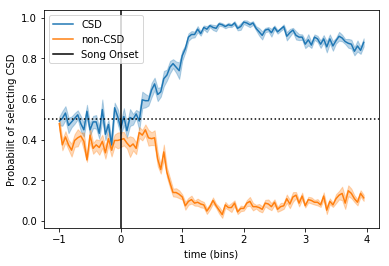

In [192]:
## Plot the two curves:

def plot_rf(target_array,background_array,classes=['CSD','non-CSD']):
    fig,ax = plt.subplots()
    iterations = target_array.shape[1]
    t_mean = np.mean(target_array,axis=1)
    t_sem = np.std(target_array,axis=1) / np.sqrt(iterations)

    br_mean = np.mean(background_array,axis=1)
    br_sem = np.std(background_array,axis=1) / np.sqrt(iterations)

    ts = np.arange(-1,4.00,5/100)
    ax.plot(ts,np.mean(target_array,axis=1),label=classes[0])
    ax.fill_between(ts,t_mean + t_sem,t_mean - t_sem,color='tab:blue',alpha=.3)

    ax.plot(ts,1 - np.mean(background_array,axis=1),label=classes[1])
    ax.fill_between(ts,1 - br_mean + br_sem,1 - br_mean - br_sem,color='tab:orange',alpha=.3)

    ax.axvline(0,color='black',label='Song Onset')
    ax.axhline(.50,color='black',linestyle=':')
    ax.set_xlabel('time (bins)')
    ax.set_ylabel('Probabilit of selecting CSD')

    ax.legend()
    fig.show()
    return fig,ax

_ = plot_rf(target_array2,background_array2)

data set sizes: 117 141


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


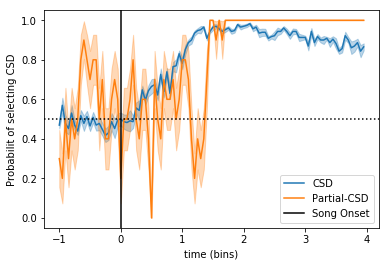

In [220]:
data = (csd_array_dist,non_array_dist)

target_array,background_array,bonus_array = bootstrap_RFC(data,iterations=10,bonus_data=part_array_dist)
_ = plot_rf(target_array,bonus_array,classes=['CSD','Partial-CSD'])

(18, 100, 91)
(100, 10)


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


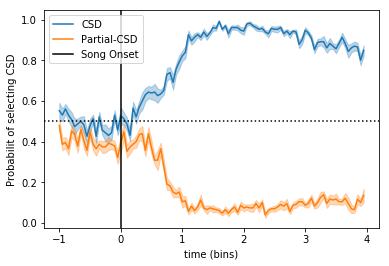

In [218]:
print(part_array_dist.shape)
print(bonus_array.shape)
_ = plot_rf(target_array,background_array,classes=['CSD','Partial-CSD'])

(117, 100, 91) (18, 100, 91)
data set sizes: 117 18
time 0
time 10
time 20
time 30
time 40
time 50
time 60
time 70
time 80
time 90


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


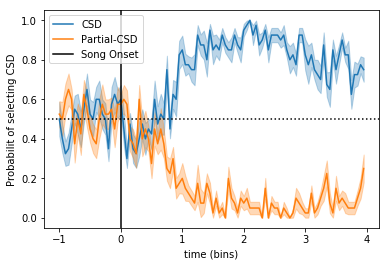

In [188]:
data = (csd_array_dist,part_array_dist)

print(csd_array_dist.shape,part_array_dist.shape)
target_array,background_array = bootstrap_RFC(data,iterations=10)
_ = plot_rf(target_array,background_array,classes=['CSD','Partial-CSD'])

data set sizes: 32 36


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


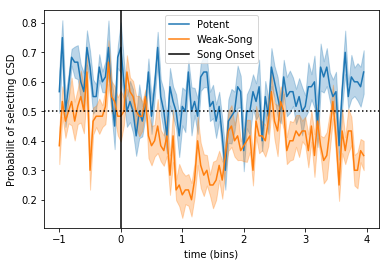

In [227]:
data = (potent_array_dist,weak_array_dist)

target_array_pot,background_array_weak,_ = bootstrap_RFC(data,iterations=10)
_ = plot_rf(target_array_pot,background_array_weak,classes=['Potent','Weak-Song'])

data set sizes: 40 52


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


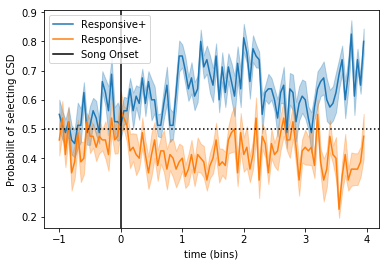

In [226]:
data = (high_array_dist,low_array_dist)

target_array_high,background_array_low,_ = bootstrap_RFC(data,iterations=10)
_ = plot_rf(target_array_high,background_array_low,classes=['Responsive+','Responsive-'])

In [230]:
print(np.mean(target_array_high[20:]),np.mean(background_array_low[20:]))
print(np.mean(target_array_pot[20:]),np.mean(background_array_weak[20:]))

0.64 0.58546875
0.5412509999999999 0.6083341250000001


In [77]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_recall_curve as prc
from sklearn.metrics import roc_curve, auc, roc_auc_score

LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

round(LR.score(X_test,y_test),4)

0.9231

[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


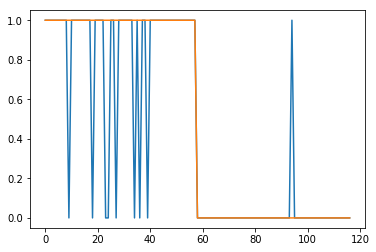

In [73]:
predictions = LR.predict(X_test)
print(predictions)
fig,ax = plt.subplots()
ax.plot(range(len(X_test)),predictions)
ax.plot(range(len(X_test)),y_test)

fig.show()


0.9231
(array([-1.,  0.,  1.]), array([  8, 108,   1]))


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


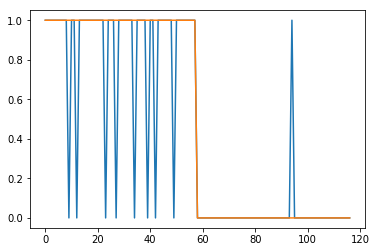

In [74]:
from sklearn import svm

SVM = svm.LinearSVC()
SVM.fit(X_train,y_train)
print(round(SVM.score(X_test,y_test),4))

predictions = SVM.predict(X_test)
#print(predictions)
fig,ax = plt.subplots()
ax.plot(range(len(X_test)),predictions)
ax.plot(range(len(X_test)),y_test)

print(np.unique(predictions - y_test,return_counts=True))
fig.show()

In [75]:
from sklearn.ensemble import RandomForestClassifier as RFC

RF = RFC(n_estimators=200,max_depth=2, random_state=0)
RF.fit(X_train,y_train)
round(RF.score(X_test,y_test),4)

0.9145

117
0.9720923436586791


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


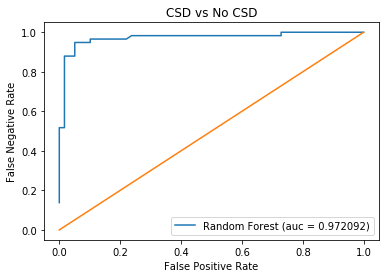

In [78]:
X_probs = RF.predict_proba(X_test)[:,1]
print(len(X_probs))
naive_probs = np.ones_like(X_probs)

fpr,tpr,_ = roc_curve(y_test,X_probs)
fpr_n,tpr_n,_ = roc_curve(y_test,naive_probs)

x_auc = auc(fpr,tpr)
print(x_auc)
x_label = 'Random Forest (auc = %f)' % x_auc
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label=x_label)
ax.plot(fpr_n,tpr_n)

ax.set_title('CSD vs No CSD')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('False Negative Rate') 
ax.legend()
fig.show()

In [79]:
## User a neural net
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(1, 1), random_state=1)
NN.fit(X_train, y_train)
#NN.predict(X)
round(NN.score(X_test,y_test), 4)

0.4957

In [80]:
## Neural net with Partial postures
X = np.vstack([csd_array[:20],part_array])
y = np.zeros(len(X))
print(X.shape)
y[:20] = 1

X_train,y_train = X[0::2],y[0::2]
X_test,y_test = X[1::2],y[1::2]

NN2 = MLPClassifier(solver = 'lbfgs',alpha=1e-5,hidden_layer_sizes=[1,1],random_state=1)
NN2.fit(X,y)
print(round(NN2.score(X,y),4))


(38, 100)
0.5263


In [81]:
## Three types with partial postures
SVM = svm.LinearSVC()
SVM.fit(Px_train,Py_train)
print('svm:',round(SVM.score(Px_test,Py_test),4))

RF = RFC(n_estimators=200,max_depth=2, random_state=0)
RF.fit(Px_train,Py_train)
print('RF:',round(RF.score(Px_test,Py_test),4))

LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr')
LR.fit(Px_train,Py_train)
print('LR:',round(LR.score(Px_test,Py_test),4))

svm: 0.8889
RF: 0.9444
LR: 0.8333


18
1.0


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


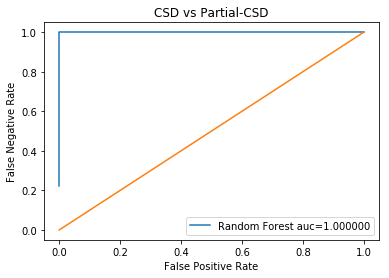

In [82]:
Px_probs = RF.predict_proba(Px_test)[:,1]
print(len(Px_probs))
naive_probs = np.ones_like(Px_probs)

fpr,tpr,_ = roc_curve(Py_test,Px_probs)
fpr_n,tpr_n,_ = roc_curve(Py_test,naive_probs)

print(auc(fpr,tpr))

p_label = 'Random Forest auc=%f' % auc(fpr,tpr)
fig,ax = plt.subplots()
ax.plot(fpr,tpr,label=p_label)
ax.plot(fpr_n,tpr_n)

ax.set_title('CSD vs Partial-CSD')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('False Negative Rate') 

ax.legend()
fig.show()

In [83]:
SVM = svm.LinearSVC()
print(Sx_train.shape,Sy_train.shape)
SVM.fit(Sx_train,Sy_train)
print('svm:',round(SVM.score(Sx_test,Sy_test),4))

RF = RFC(n_estimators=200,max_depth=2, random_state=0)
RF.fit(Sx_train,Sy_train)
print('RF:',round(RF.score(Sx_test,Sy_test),4))

LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(Sx_train,Sy_train)
print('LR:',round(LR.score(Sx_test,Sy_test),4))

(32, 100) (32,)
svm: 0.5
RF: 0.5625
LR: 0.4375


32
0.6640625


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


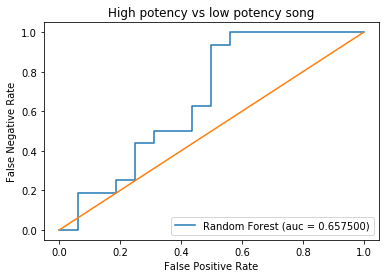

In [88]:
Sx_probs = RF.predict_proba(Sx_test)[:,1]
print(len(Sx_probs))
naive_probs = np.ones_like(Sx_probs)

s_label = 'Random Forest (auc = %f)' %auc(fpr,tpr)
fpr,tpr,_ = roc_curve(Sy_test,Sx_probs)
fpr_n,tpr_n,_ = roc_curve(Sy_test,naive_probs)

print(auc(fpr,tpr))

fig,ax = plt.subplots()
ax.plot(fpr,tpr,label=s_label)
ax.plot(fpr_n,tpr_n)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('False Negative Rate')

ax.set_title('High potency vs low potency song')
ax.legend()
fig.show()

In [203]:
### Run on responsive vs low_responsive
print(len(Rx_train))

SVM = svm.LinearSVC()
print(Rx_train.shape,Ry_train.shape)
SVM.fit(Rx_train,Ry_train)
print('svm:',round(SVM.score(Rx_test,Ry_test),4))

RF = RFC(n_estimators=200,max_depth=2, random_state=0)
RF.fit(Rx_train,Ry_train)
print('RF:',round(RF.score(Rx_test,Ry_test),4))

LR = LogisticRegression(random_state=0,solver='lbfgs',multi_class='ovr').fit(Rx_train,Ry_train)
print('LR:',round(LR.score(Rx_test,Ry_test),4))

40
(40, 100) (40,)
svm: 0.625
RF: 0.55
LR: 0.525


0.55
auc: 0.66


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


"\nfig,ax = plt.subplots()\nax.plot(recall,precision)\nax.plot(rec_naive,prec_naive,linestyle=':')\nax.set_xlabel('Recall')\nax.set_ylabel('Precision')\nfig.show()\n"

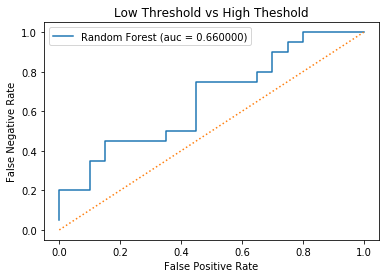

In [204]:
## Plot ROC curve for responsivity
M = RF ## Assign model for this
print(round(M.score(Rx_test,Ry_test),4))
probs = M.predict_proba(Rx_test)[:,1]
naive_probs = np.ones_like(probs)
y_true = Ry_test


precision, recall, thresholds = prc(y_true,probs)
prec_naive,rec_naive,_ = prc(y_true,naive_probs)

fpr, tpr, _ = roc_curve(y_true,probs)
fpr_n,tpr_n,_ = roc_curve(y_true,naive_probs)

print('auc:',auc(fpr,tpr))
#print(auc(fpr_n,tpr_n))

fig,ax = plt.subplots()

p_label = 'Random Forest (auc = %f)' %auc(fpr,tpr)

ax.plot(fpr,tpr,label=p_label)
ax.plot(fpr_n,tpr_n,linestyle=':')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('False Negative Rate')
ax.set_title('Low Threshold vs High Theshold')
ax.legend()
fig.show()

"""
fig,ax = plt.subplots()
ax.plot(recall,precision)
ax.plot(rec_naive,prec_naive,linestyle=':')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
fig.show()
"""

In [87]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 

masks = np.load('test_masks.npy')
course_masks = np.load('course_masks.npy')

fig,(ax1,ax2) = plt.subplots(2)

ax1.imshow(masks[0])
ax2.imshow(course_masks[0])

x_dim = 1024
y_dim = 1024
scale = 1./8
big_step = 1024 * scale
step = 103
points = []
for n in np.arange(0,x_dim,step):
    for m in np.arange(0,y_dim,step):
        x_course = int(n/big_step)
        y_course = int(m/big_step)
        if course_masks[0][y_course,x_course] > .1:
            if (x_course,y_course) not in points:
                points.append((x_course,y_course))

points = np.array(points)
print(points)
ax2.scatter(points[:,0],points[:,1],color='red')


fig.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test_masks.npy'

In [26]:
test_dict = {}
test_dict[(1,2,3)] = 1
test_dict[(2,3,4)] = 1

False

In [32]:
(124.9 // 5) * 5

120.0

In [27]:
sample_rate = 48000
onset_df = pd.read_csv('/data/birds/postures/birdview-2019/2019-onsets-birdview.txt',header=None,delim_whitespace=True)
volume_row = onset_df[onset_df[0] == '2019-06-08-11-46-13_ND.wav.bag']
offset = volume_row[5]
print(offset.item() / 48000)

1.4345625


292


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


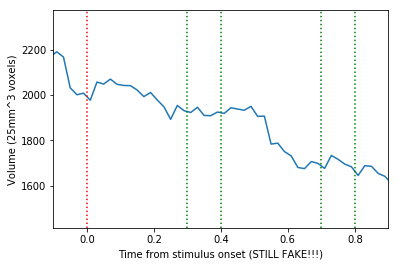

In [29]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 


#volumes = np.load('/data/birds/postures/birdview-2019/2019-06-11-08-46-12_WG_short/2019-06-11-08-46-12_WG_short_volume.npy')
volumes = np.load('/data/birds/postures/birdview-2019/2019-06-04-10-16-10_BDY_short/2019-06-04-10-16-10_BDY_short_volume.npy')
#volumes = np.load('/data/birds/postures/birdview-2019/2019-06-08-13-16-12_BDY/2019-06-08-13-16-12_BDY_volume.npy')

#volumes = np.load('/data/birds/postures/birdview-2019/2019-06-08-11-46-13_ND2019-06-08-11-46-13_ND_volume.npy')
#vol_onset = onset_df[]
print(len(volumes))
fig,ax = plt.subplots()

ax.plot(np.arange(0,len(volumes) * .02,.02) - 1.53,volumes)
ax.axvline(0,linestyle=':',color='red')

ax.axvline(0.3,linestyle=':',color='green')
ax.axvline(0.4,linestyle=':',color='green')

ax.axvline(0.7,linestyle=':',color='green')
ax.axvline(0.8,linestyle=':',color='green')
#ax.plot(volumes0,alpha=.8)
ax.set_ylabel('Volume (25mm^3 voxels)')
ax.set_xlabel('Time from stimulus onset (STILL FAKE!!!)')

ax.set_xlim([-0.1,.9])
fig.show()
#fig.savefig('/home/ammon/Desktop/PaperFigs/wingstroke_trace_close.svg')

(1024, 1024)
1.0


/home/ammon/anaconda3/envs/vak-env/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


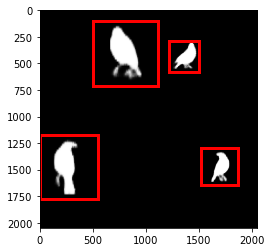

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches

masks = np.load('./2019-06-24-11-46-15_BDY_clipped/masks/masks_5.npy')
boxes = np.load('./2019-06-24-11-46-15_BDY_clipped/masks/box_5.npy')

masks = np.load('/data/birds/postures/birdview-2019/2019-06-08-13-16-12_BDY/masks/masks_371.npy')
boxes = np.load('/data/birds/postures/birdview-2019/2019-06-08-13-16-12_BDY/masks/box_371.npy')
fig,ax = plt.subplots()

#ax.imshow(np.sum(masks,0))
print(masks[0].shape)
all_mask = np.zeros([2048,2048])
all_mask[:1024,:1024] = masks[0]
all_mask[:1024,1024:] = masks[1]
all_mask[1024:,:1024] = masks[2]
all_mask[1024:,1024:] = masks[3]

all_mask[1020:1028,:] = 1
all_mask[:,1020:1028] = 1
ax.imshow(all_mask,cmap='Greys_r')
#ax.imshow(masks[0],cmap='Greys_r')

print(np.max(all_mask))
x_offset = [0,1024,0,1024]
y_offset = [0,0,1024,1024]

for b in range(len(boxes)):
    (x0,y0,x1,y1) = boxes[b]
    w = x1 - x0
    h = y1 - y0
    rect = patches.Rectangle((x0+x_offset[b],y0+y_offset[b]),w,h,linewidth=3,edgecolor='r',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)


    
fig.savefig('/home/ammon/Desktop/PaperFigs/masks_all.png',dpi=300)
fig.show()


In [291]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
import numpy as np

%matplotlib inline
#clouds = np.load('/data/birds/postures/birdview-2019/2019-06-08-13-16-12_BDY/2019-06-08-13-16-12_BDY_cloud.npy')
clouds = np.load('/home/ammon/Documents/Scripts/deep-high-resolution-net.pytorch/demo/test_cloud.npy')

print(np.shape(clouds))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
f = 5

cloud_array = np.array(clouds[f])

color_map = cm.get_cmap('viridis')
z_max,z_min = np.max(cloud_array[:,2]),np.min(cloud_array[:,2])
z_range = z_max - z_min
"""
clip_points = np.load('./2019-06-24-11-46-15_BDY_clipped/pred_keypoints_3d.npy')
clip_points = clip_points * 1000
"""
for p in range(len(cloud_array)):
    height_ratio = (cloud_array[p,2] - z_min) / z_range
    ax.scatter(cloud_array[p,0],cloud_array[p,1],cloud_array[p,2],color=color_map(height_ratio),alpha=.1,s=5,marker='s')
    pass
"""
for k in range(len(clip_points[f])):
    ax.scatter(clip_points[f,k,0],clip_points[f,k,1],clip_points[f,k,2],color='red')
 """   
ax.w_xaxis.set_pane_color([0,0,0,1])
ax.w_yaxis.set_pane_color([0,0,0,1])
ax.w_zaxis.set_pane_color([0,0,0,1])

ax.view_init(10, 170)

ax.set_xlim([0,500])
ax.set_ylim([0,500])
ax.set_zlim([0,500])

fig.set_size_inches((6,6))
fig.show()

ModuleNotFoundError: No module named 'numpy.core._multiarray_umath'

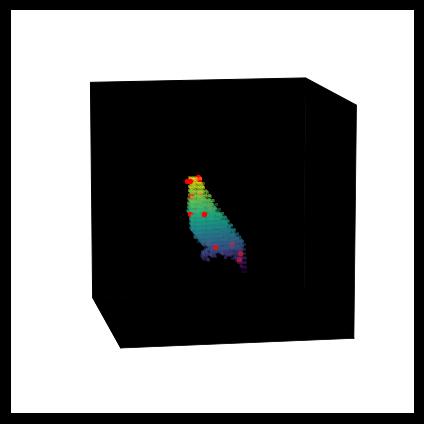

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib notebook

%matplotlib inline
clouds = np.load('/home/ammon/Documents/Scripts/deep-high-resolution-net.pytorch/demo/test_cloud.npy')


#print(np.shape(clouds))

#fig = plt.figure()
#ax = fig.add_subplot(111,projection='3d')
f = 80

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for f in range(len(clouds)):
    ax.clear()
    cloud_array = clouds[f]
    #cloud_array = np.array(clouds[f])

    #cloud_array = cloud_array[~np.isnan(cloud_array)]
    color_map = cm.get_cmap('viridis')
    z_max,z_min = np.nanmax(cloud_array[:,2]),np.nanmin(cloud_array[:,2])
    z_range = z_max - z_min

    #clip_points = np.load('./2019-06-24-11-46-15_BDY_clipped/pred_keypoints_3d.npy')
    clip_points = np.load('/home/ammon/Documents/Scripts/deep-high-resolution-net.pytorch/demo/test_3d.npy')
    clip_points = clip_points * 1000

    for p in range(len(cloud_array)):
        height_ratio = (cloud_array[p,2] - z_min) / z_range
        if np.isnan(cloud_array[p,0]):
            continue
        ax.scatter(cloud_array[p,0],cloud_array[p,1],cloud_array[p,2],color=color_map(height_ratio),alpha=.3,s=5,marker='s')


    for k in range(len(clip_points[f])):
        ax.scatter(clip_points[f,k,0],clip_points[f,k,1],clip_points[f,k,2],color='red')

    ax.w_xaxis.set_pane_color([0,0,0,1])
    ax.w_yaxis.set_pane_color([0,0,0,1])
    ax.w_zaxis.set_pane_color([0,0,0,1])

    ax.view_init(10, 170)

    ax.set_xlim([100,450])
    ax.set_ylim([0,350])
    ax.set_zlim([150,400])
    # Hide grid lines
    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    fig.tight_layout()
    fig.set_size_inches((6,6))
    fig.patch.set_facecolor('black')
    #fig.show()
    fig.savefig('/home/ammon/Desktop/PaperFigs/images/point_cloud%04d.png'%f,dpi=300)

#fig.show()

In [16]:
print(clip_points.shape)
print(clouds[0])


(13, 17, 3)
[[227.5 157.5 267.5]
 [227.5 157.5 272.5]
 [227.5 157.5 277.5]
 ...
 [  nan   nan   nan]
 [  nan   nan   nan]
 [  nan   nan   nan]]


(13, 1916, 3)


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


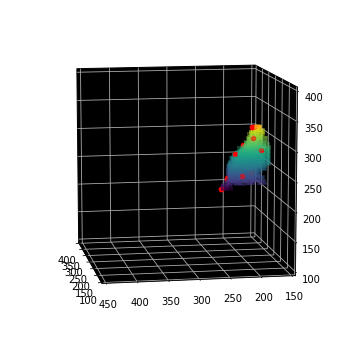

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
#%matplotlib notebook

%matplotlib inline
#clouds = np.load('/home/ammon/Documents/Scripts/deep-high-resolution-net.pytorch/demo/test_cloud.npy')
clouds = np.load('/home/ammon/Documents/Scripts/keypoint_detection/data_dir/2019-06-12-11-46-13_LNR_veryveryshort/cloud_3d.npy')


#print(np.shape(clouds))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
f = 10

cloud_array = clouds[f]
print(clouds.shape)
#cloud_array = np.array(clouds[f])

#cloud_array = cloud_array[~np.isnan(cloud_array)]
color_map = cm.get_cmap('viridis')
z_max,z_min = np.nanmax(cloud_array[:,2]),np.nanmin(cloud_array[:,2])
z_range = z_max - z_min

clip_points = np.load('/home/ammon/Documents/Scripts/keypoint_detection/data_dir/2019-06-12-11-46-13_LNR_veryveryshort/pred_keypoints_3d.npy')
#clip_points = np.load('/home/ammon/Documents/Scripts/deep-high-resolution-net.pytorch/demo/test_3d.npy')
clip_points = clip_points * 1000

for p in range(len(cloud_array)):
    height_ratio = (cloud_array[p,2] - z_min) / z_range
    if np.isnan(cloud_array[p,0]):
        continue
    ax.scatter(cloud_array[p,0],cloud_array[p,1],cloud_array[p,2],color=color_map(height_ratio),alpha=.3,s=5,marker='s')


for k in range(len(clip_points[f])):
    ax.scatter(clip_points[f,k,0],clip_points[f,k,1],clip_points[f,k,2],color='red')
    
ax.w_xaxis.set_pane_color([0,0,0,1])
ax.w_yaxis.set_pane_color([0,0,0,1])
ax.w_zaxis.set_pane_color([0,0,0,1])

ax.view_init(10, 170)

ax.set_xlim([100,400])
ax.set_ylim([150,450])
ax.set_zlim([100,400])

fig.set_size_inches((6,6))
fig.savefig('/home/ammon/Desktop/PaperFigs/point_cloud_blank.png',dpi=300)
fig.show()


In [312]:
ax.set_xlim([100,400])
ax.set_ylim([100,400])
ax.set_zlim([100,400])

fig.set_size_inches((6,6))
#fig.savefig('/home/ammon/Desktop/PaperFigs/point_cloud_blank.png',dpi=300)
fig.show()

/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [308]:
print(z_range,z_min,z_max)

nan nan 312.5


In [304]:
cloud_array.shape

(197, 2147, 3)

In [29]:
clip_points = np.load('./2019-06-24-11-46-15_BDY_clipped/pred_keypoints_3d.npy')
print(np.shape(clip_points))

(6, 20, 3)


In [118]:
from sklearn.decomposition import PCA
pca_points = PCA()
pca_points.fit(np.array(clouds[300]))
print(np.round(pca_points.explained_variance_ratio_,2))
output = pca_points.components_[:2]
print('5' + str(output.flatten()).replace('[','').replace(' ',',').replace(']',''))

[0.64 0.21 0.14]
5,0.38700851,-0.65667147,-0.64730749,-0.37713039,,0.52788199,-0.76099492


In [48]:
import cv2

cap = cv2.VideoCapture('/data/birds/postures/birdview-2019/2019-06-28-11-46-14_WG.wav.mp4')

while(1):
    ret,frame = cap.read()
    print(ret)
    if not ret:
        print('Done!')
        break

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [78]:
test2 = np.load('./2019-06-12-11-46-13_LNR_veryveryshort/pred_keypoints_3d.npy')

print(np.shape(test_3d))
print(np.shape(test2))
print(test_3d[0])
print(test2[0])


(20, 3, 13)
(20, 3, 13)
[[205. 245. 205. 425. 495. 205. 195. 225. 225. 225. 235. 225. 225.]
 [355. 185. 375. 135. 115. 385. 495. 195. 195. 195. 255. 455. 455.]
 [375. 325. 385. 375. 395. 385. 425. 325. 325. 325. 315. 425. 425.]]
[[220.5 220.5 300.5 220.5 300.5 340.5 300.5 300.5 320.5 340.5 300.5 320.5
  320.5]
 [200.5 200.5 200.5 200.5 200.5 220.5 200.5 200.5 200.5 220.5 200.5 220.5
  220.5]
 [320.5 320.5 300.5 320.5 300.5 285.5 300.5 300.5 300.5 300.5 300.5 240.5
  240.5]]


(679, 20, 3)


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


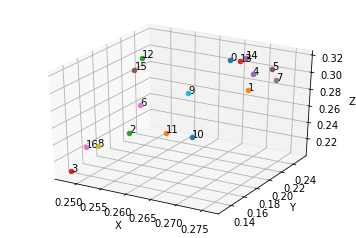

In [26]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 

%matplotlib inline

#sequence = np.load('../keypoint_detection/data_dir/2019-06-12-11-46-13_LNR_veryveryshort/pred_keypoints_3d.npy')
sequence = np.load('/data/birds/postures/birdview-2018/2018-05-30-11-17-56_DMG/pred_keypoints_3d.npy')
print(sequence.shape)
test2 = sequence[0]
fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')

f = 230
for p in range(17):
    ax1.scatter(test2[p,0],test2[p,1],test2[p,2])
    ax1.text(test2[p,0],test2[p,1],test2[p,2],str(p))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

fig1.show()

(4, 17, 3, 990)
nan
0.059374269072523876


/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


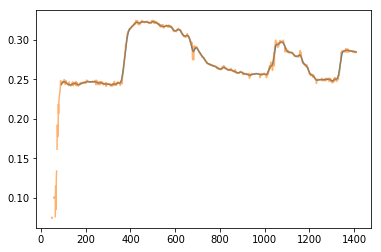

In [49]:
from scipy.ndimage import gaussian_filter1d


fig,ax = plt.subplots()
#sequence = np.load('../keypoint_detection/data_dir/2019-06-12-11-46-13_LNR_veryveryshort/pred_keypoints_3d.npy')
#sequence = np.load('/data/birds/postures/birdview2-2019/2019-06-26-08-34-11_BDY/pred_keypoints_3d.npy')
sequence = np.load('/data/birds/postures/birdview-2018/2018-06-01-09-48-06/pred_keypoints_3d.npy')
#sequence_2d = np.load('/data/birds/postures/birdview-2018/2018-05-30-14-18-02_LB-/pred_keypoints_2d.npy')
#sequence_2d = np.load('/data/birds/postures/birdview-2019/2019-06-03-07-19-01_BOD/pred_keypoints_2d.npy')
print(sequence_2d.shape)
for s in range(4):    
    #ax.plot(sequence_2d[s,10,1])
    pass
fig.show()
ax.plot(gaussian_filter1d(sequence[:,10,2],5))
ax.plot(sequence[:,10,2],alpha=.6)
#print(np.unique(~np.isnan(sequence[:,10,2])))

print(np.min(sequence))
print(np.nanmin(sequence))

<IPython.core.display.Javascript object>


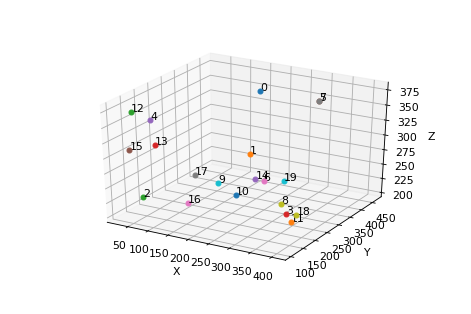

In [87]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

f = 0
for p in range(20):
    ax.scatter(test_3d[p,0,f],test_3d[p,1,f],test_3d[p,2,f])
    ax.text(test_3d[p,0,f],test_3d[p,1,f],test_3d[p,2,f],str(p))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

fig.show()

In [65]:
tuple([50] * 3)

(50, 50, 50)

In [76]:
import itertools
all_points = np.array(list(itertools.product(np.arange(0,500,5),np.arange(0,500,5),np.arange(0,500,5))))
hom_points = np.ones([len(all_points),4])
hom_points[:,:3] = all_points / 1000
print(all_points,hom_points)

P_c = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
print(P_c.shape)
np.dot()

[[  0   0   0]
 [  0   0   5]
 [  0   0  10]
 ...
 [495 495 485]
 [495 495 490]
 [495 495 495]] [[0.    0.    0.    1.   ]
 [0.    0.    0.005 1.   ]
 [0.    0.    0.01  1.   ]
 ...
 [0.495 0.495 0.485 1.   ]
 [0.495 0.495 0.49  1.   ]
 [0.495 0.495 0.495 1.   ]]


In [89]:
for i in range(10):
    for j in range(10):
        break
    print(i)

0
1
2
3
4
5
6
7
8
9


In [100]:
np.unique(all_points,axis=0)

array([[  0,   0,   0],
       [  0,   0,   5],
       [  0,   0,  10],
       ...,
       [495, 495, 485],
       [495, 495, 490],
       [495, 495, 495]])

In [ ]:
import cv2
  
capture = cv2.VideoCapture('/data/birds/postures/TrainingPostures/bv-2019/2019-06-10-07-16-13_ND_clipped.mp4')
  
while(True):
      
    ret, frame = capture.read()
 
    grayFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    cv2.imshow('video gray', grayFrame)
    cv2.imshow('video original', frame)
      
    if cv2.waitKey(1) == 27:
        break

capture.release()
cv2.destroyAllWindows()

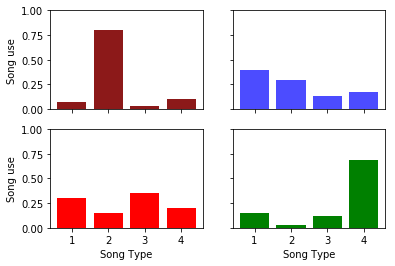

In [82]:
sample_data0 = [.30,.15,.35,.2]
sample_data1 = [.4,.3,.13,.17]
sample_data2 = [.07,.8,.03,.1]
sample_data3 = [.15,.03,.12,.69]

fig,axes = plt.subplots(2,2,sharey=True,sharex=True)
axes[1,0].bar(np.arange(1,5),sample_data0,color='red',label='Dominant Male')
axes[0,1].bar(np.arange(1,5),sample_data1,color='blue',alpha = .7,label='Pair Female')
axes[0,0].bar(np.arange(1,5),sample_data2,color='maroon',alpha=.9,label='Subordinant Male')
axes[1,1].bar(np.arange(1,5),sample_data3,color='green',label='Other Female')

axes[0,0].set_ylim(0,1)
axes[0,0].set_ylabel('Song use')
axes[1,0].set_xlabel('Song Type')
axes[1,0].set_ylabel('Song use')
axes[1,1].set_xlabel('Song Type')



fig.savefig('/home/ammon/Desktop/PaperFigs/fake_aviary.png',dpi=300)

/home/ammon/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


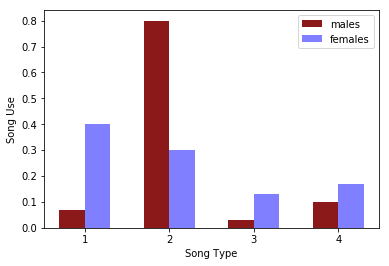

In [85]:
fig, ax = plt.subplots()
ax.bar(np.arange(1,5) - .15,sample_data2,color='maroon',alpha=.9,width=.3,label='males')
ax.bar(np.arange(1,5) +  .15,sample_data1,color='blue',alpha=.5,width=.3,label='females')
ax.set_xticks([1,2,3,4])
ax.set_xticklabels([1,2,3,4])
ax.set_xlabel('Song Type')
ax.set_ylabel('Song Use')
ax.legend()
fig.show()
fig.savefig('/home/ammon/Desktop/PaperFigs/fake_aviary2.png',dpi=300)